In [5]:
#그래프생성 라이브러리 import
import matplotlib.pyplot as plt
#한글폰트 설정
plt.rc('font', family = 'Malgun Gothic')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus = False)

In [6]:
#데이터 읽기 라이브러리 import
import pandas as pd
df = pd.read_csv('data/score.csv')
df['학년']=[3, 3, 2, 1, 1, 3, 2, 2]
df

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기,학년
0,1번,채치수,북산고,197,90,85,100,95,85,Python,3
1,2번,정대만,북산고,184,40,35,50,55,25,Java,3
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript,2
3,4번,서태웅,북산고,187,40,60,70,75,80,Java,1
4,5번,강백호,북산고,188,15,20,10,35,10,Java,1
5,6번,변덕규,능남고,202,80,100,95,85,80,C#,3
6,7번,황태산,능남고,188,55,65,45,40,35,Python,2
7,8번,윤대협,능남고,190,100,85,90,95,95,C#,2


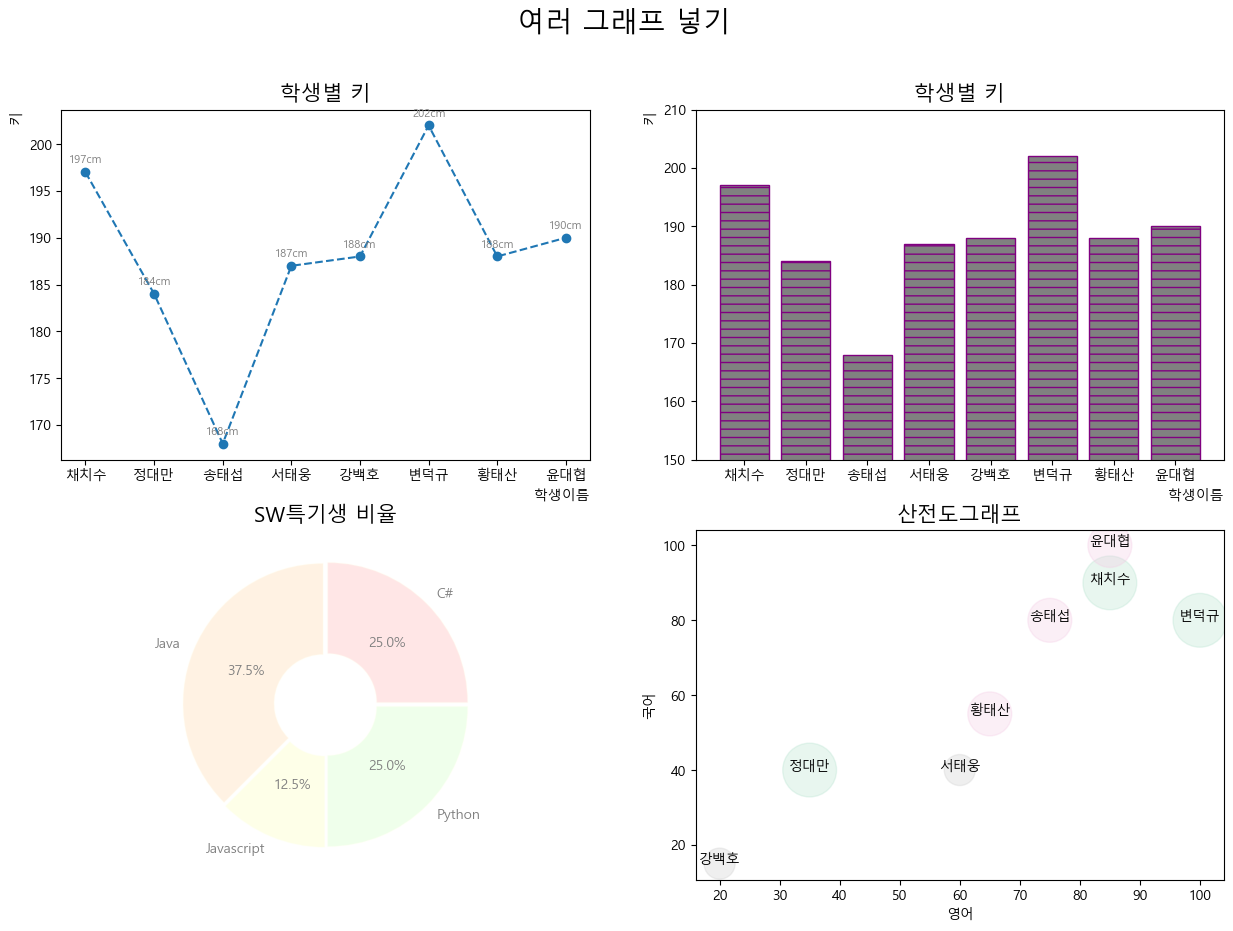

In [7]:
#다중그래프 생성(전체 fig, 개별 axs)
fig, axs = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('여러 그래프 넣기', size=20)

#(0,0)첫번째그래프
axs1= axs[0,0]
axs1.plot(df['이름'], df['키'], marker='o', ls='--')
axs1.set_title('학생별 키', size=15)
axs1.set_xlabel('학생이름', loc='right')
axs1.set_ylabel('키', loc='top')
for idx in range(len(df)):
    x=idx
    y=df.loc[idx,'키']
    text=f'{y}cm'
    axs1.text(x,y+1,text,ha='center',size=8,color='gray')

#(0,1)두번째그래프
axs2= axs[0,1]
axs2.set_title('학생별 키', size=15)
axs2.bar(df['이름'], df['키'], color='gray', hatch='--', ec='purple')
axs2.set_xlabel('학생이름', loc='right')
axs2.set_ylabel('키', loc='top')
axs2.set_ylim(150,210)

#(1,0)세번째그래프
axs3= axs[1,0]
axs3.set_title('SW특기생 비율', size=15)
group = df.groupby('SW특기').size()
values=group.values
labels=group.index
colors = ['#FFADAD','#FFD6A5','#FDFFB6','#CAFFBF','#9BF6FF','#A0C4FF']
axs3.pie(values, labels=labels,
        explode=[0.02]*len(group),
        autopct='%.1f%%',colors=colors,
        wedgeprops= {'width':0.65, 'edgecolor':'ivory','alpha':0.3},
        textprops={'color':'gray'})

#(1,1)네번째그래프
axs4= axs[1,1]
axs4.set_title('산전도그래프', size=15)
axs4.scatter(df['영어'], df['국어'], alpha=0.3, s=df['학년']*500,c = df['학년'], cmap='Pastel2_r')
axs4.set_xlabel('영어')
axs4.set_ylabel('국어')
for idx in range(len(df)):
    x=df.loc[idx,'영어']
    y=df.loc[idx,'국어']
    text = df.loc[idx,'이름']
    axs4.text(x,y,text,ha='center')
# axs4.set_colorbar(ticks=[1,2,3], orientation='horizontal', label='학년', shrink=0.5)

plt.show()

In [8]:
#데이터 읽기 라이브러리 import
import pandas as pd
df = pd.read_csv('data/score.csv')
df['평균'] = df.apply(lambda row:row['국어':'사회'].mean(), axis=1)
df

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기,평균
0,1번,채치수,북산고,197,90,85,100,95,85,Python,91.0
1,2번,정대만,북산고,184,40,35,50,55,25,Java,41.0
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript,76.0
3,4번,서태웅,북산고,187,40,60,70,75,80,Java,65.0
4,5번,강백호,북산고,188,15,20,10,35,10,Java,18.0
5,6번,변덕규,능남고,202,80,100,95,85,80,C#,88.0
6,7번,황태산,능남고,188,55,65,45,40,35,Python,48.0
7,8번,윤대협,능남고,190,100,85,90,95,95,C#,93.0


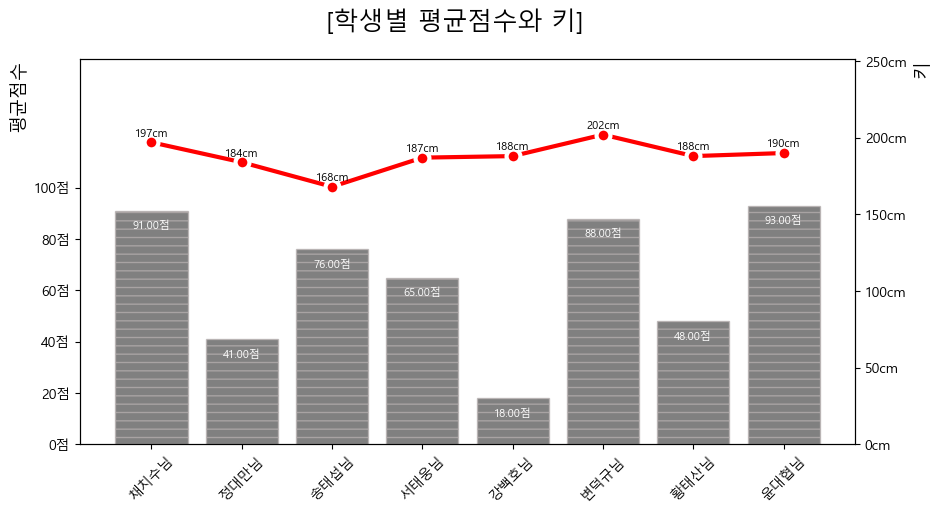

In [123]:
#평균/키그래프
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()
fig.suptitle('[학생별 평균점수와 키]', size=18)


#평균
ax1.bar(df['이름'], df['평균'], color="gray", ec="#b8b1b1b7", label='평균점수', hatch='--')
ax1.set_ylabel('평균점수', size=13, loc='top')
ax1.set_ylim(0,150) #겹치지않게 각자 lim조절
for idx, y in enumerate(df['평균']):
    ax1.text(idx, y-7, f'{y:.2f}점', ha='center', size=8, color='white')
yticks=[y for y in range(0,101,20)]
ax1.set_yticks(yticks, [f'{y}점' for y in yticks])
ax1.set_xticks(df['이름'], df['이름']+'님',rotation=45)
# ax1.legend(loc=(0.01,1.03))

ax2.plot(df['이름'], df['키'], color='r', ls='-',
         marker='o', ms=10, lw=3, mec='w', label='키', mew=3)
ax2.set_ylabel('키', size=13, loc='top')
ax2.set_ylim(0,251) #겹치지않게 각자 lim조절
for idx, y in enumerate(df['키']):
    ax2.text(idx, y+4, f'{y}cm', ha='center', size=8)
yticks=[y for y in range(0,255,50)]
ax2.set_yticks(yticks,[f'{y}cm' for y in yticks])
# ax2.legend(loc=(0.01,1.1))
plt.savefig('data/평균점수와키.png') #show전에 save
plt.show()